In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

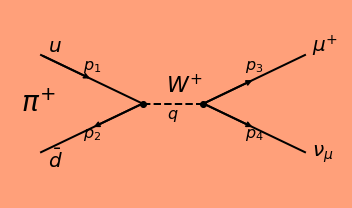

In [30]:
fig, ax = plt.subplots(figsize=(5,3))
fig.patch.set_facecolor("lightsalmon")
ax.set_facecolor("lightsalmon")
def centered_arrow(x0, y0, x1, y1, reverse=False):
    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2
    if reverse:
        ax.annotate(
            "", xy=(xm, ym), xytext=(x1, y1),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black")
        )
    else:
        ax.annotate(
            "", xy=(xm, ym), xytext=(x0, y0),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black")
        )
    ax.plot([x0, x1], [y0, y1], color="black", linewidth=2)
    return xm, ym

L = 0.30      
H = 0.25     
G = 0.18     
x_left  = 0.10
x_v1    = x_left + L
x_v2    = x_v1 + G
x_right = x_v2 + L
y_mid = 0.50
y_top = y_mid + H
y_bot = y_mid - H

xm1, ym1 = centered_arrow(x_left, y_top, x_v1, y_mid)              
xm2, ym2 = centered_arrow(x_left, y_bot, x_v1, y_mid, reverse=True)   
xm3, ym3 = centered_arrow(x_v2, y_mid, x_right, y_top)               
xm4, ym4 = centered_arrow(x_v2, y_mid, x_right, y_bot)  

ax.plot(
    [x_v1, x_v2],
    [y_mid, y_mid],
    linestyle='dashed',
    color='black',
    linewidth=2
)
xq = (x_v1 + x_v2) / 2
yq = y_mid
ax.text(xq, yq - 0.06, r"$q$", fontsize=16, ha='center', va='center')
ax.text(xm1, ym1 + 0.05, r"$p_1$", fontsize=16, ha='center')
ax.text(xm2, ym2 - 0.05, r"$p_2$", fontsize=16, ha='center')
ax.text(xm3, ym3 + 0.05, r"$p_3$", fontsize=16, ha='center')
ax.text(xm4, ym4 - 0.05, r"$p_4$", fontsize=16, ha='center')
ax.text(x_left - 0.06, y_mid, r"$\pi^{+}$", fontsize=28, va='center')
ax.text(x_left + 0.02, y_top + 0.02, r"$u$", fontsize=20)
ax.text(x_left + 0.02, y_bot - 0.07, r"$\bar{d}$", fontsize=20)
ax.text((x_v1 + x_v2)/2 - 0.02, y_mid + 0.06, r"$W^{+}$", fontsize=22)
ax.text(x_right + 0.02, y_top + 0.02, r"$\mu^{+}$", fontsize=20)
ax.text(x_right + 0.02, y_bot - 0.02, r"$\nu_{\mu}$", fontsize=20)
ax.scatter([x_v1, x_v2], [y_mid, y_mid], color='black')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.savefig("feynmandiagram.png", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
u        = np.array([1/2,  2/3,  1/3,  0])
dbar     = np.array([1/2,  1/3, -1/3,  0])
mu_plus  = np.array([1/2,  1,    0,    -1])
nu_mu    = np.array([1/2,  0,    0,    1])

incoming_v1 = u + dbar    
print("Vertex 1 (u + d̄ → W⁺):")
print("Incoming Quantum Numbers:", incoming_v1)
outgoing_v2 = mu_plus + nu_mu
print("\nVertex 2 (W⁺ → μ⁺ + νμ):")
print("Outgoing Quantum Numbers:", outgoing_v2)
print("\nQuantum number Conservation Check:")
labels = ["Spin", "Charge", "Baryon Number", "Lepton Number"]

for i, label in enumerate(labels):
    q1 = incoming_v1[i]
    q2 = outgoing_v2[i]
    conserved = (abs(q1 - q2) < 1e-12)
    print(f"{label:10s}:  Vertex 1={q1:6.3f},  Vertex 2={q2:6.3f},  Conserved? {conserved}")

Vertex 1 (u + d̄ → W⁺):
Incoming Quantum Numbers: [1. 1. 0. 0.]

Vertex 2 (W⁺ → μ⁺ + νμ):
Outgoing Quantum Numbers: [1. 1. 0. 0.]

Quantum number Conservation Check:
Spin      :  Vertex 1= 1.000,  Vertex 2= 1.000,  Conserved? True
Charge    :  Vertex 1= 1.000,  Vertex 2= 1.000,  Conserved? True
Baryon Number:  Vertex 1= 0.000,  Vertex 2= 0.000,  Conserved? True
Lepton Number:  Vertex 1= 0.000,  Vertex 2= 0.000,  Conserved? True


In [38]:
GF = 1.1663787e-5        
Vud = 0.97420
f_pi = 0.1304            
m_pi = 0.13957           
m_mu = 0.10566           
hbar_GeV_s = 6.582119569e-25   

def invariant_amplitude(s):
    return np.sqrt(matrix_element_squared())

def matrix_element_squared():
    return (GF**2) * (Vud**2) * (f_pi**2) * \
           (m_mu**2) * (m_pi**2 - m_mu**2)
M2 = matrix_element_squared()

def p_cm(s, m1, m2):
    lam = (s - (m1 + m2)**2)*(s - (m1 - m2)**2)
    if lam <= 0:
        return 0.0
    return np.sqrt(lam) / (2*np.sqrt(s))

def dsigma_dOmega(s):
    m_a = 0.0
    m_b = m_pi
    m_c = m_mu
    m_d = 0.0
    p_i = p_cm(s, m_a, m_b)
    p_f = p_cm(s, m_c, m_d)
    if p_i == 0:
        return 0.0
    return (1/(64*np.pi**2 * s)) * (p_f/p_i) * M2

def decay_rate_GeV():
    return (GF**2 * Vud**2 * f_pi**2 * m_mu**2 * m_pi / (8*np.pi)) * \
           (1 - (m_mu**2)/(m_pi**2))**2
Gamma_GeV = decay_rate_GeV()
Gamma_s = Gamma_GeV / hbar_GeV_s
tau = 1.0 / Gamma_s

@interact(s=widgets.FloatSlider(
    value=1.0,
    min=(m_pi+m_mu)**2,
    max=10.0,
    step=0.01,
    description='s (GeV²)',
    continuous_update=False))
def show_results(s):
    print("\n================= RESULTS =================")
    print(f"Mandelstam s: {s:.4f} GeV²")
    print(f"√s: {np.sqrt(s):.4f} GeV\n")
    M_val = invariant_amplitude(s)
    print("---- Invariant Amplitude ----")
    print(f"M(s)  = {M_val:.6e}")
    print(f"|M|²  = {M2:.6e} GeV⁴\n")
    dsdo = dsigma_dOmega(s)
    print("---- Differential Cross Section ----")
    print(f"dσ/dΩ(s) = {dsdo:.6e} GeV⁻²\n")
    print("---- Pion Decay (Fixed) ----")
    print(f"Γ (GeV):  {Gamma_GeV:.6e}")
    print(f"Γ (s⁻¹):  {Gamma_s:.6e}")
    print(f"τ (s):    {tau:.6e}")

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='s (GeV²)', max=10.0, min=0.…